# Jupyter  Notebook
- A web application that allows you to combine **explanatory text**, **math equations**, **code**, and **visualizations** all in one easily sharable document.
 - A form of __[literate programming](http://www.literateprogramming.com/)__.

## Notebook Processing Flow 

Check this link if you want to understand in more depth __[how it works](https://jupyter.readthedocs.io/en/latest/architecture/how_jupyter_ipython_work.html)__.

<img src="images/notebook_components.png" alt="Notebook architecture flow" title="Notebook Processing Flow" />

- Server can be run *locally* OR *remote*
- List with __[available kernels](https://github.com/jupyter/jupyter/wiki/Jupyter-kernels)__

## Notebook Keyboard Shortcuts

Some handy Jupyter Notebook keyboard shortcuts

### Notebook Mode
**Command Mode** - **`[Esc]`**
* Use key presses to execute commands
* <font color=blue>BLUE Cell</font>
* Default

**Edit Mode** - **`[Enter/Return]`**
* Type into cells 
* <font color=green>GREEN Cell</font>
* Cursor

### Command Mode
* Creating cells above **`[A]`** or below **`[B]`**
* Deleting cells **`[DD]`**
* Saving Notebook **`[S]`**
* Line numbers **`[L]`**
* Command Pallete **`[P]`**
* Shortcuts Help **`[H]`** 

### Cell Types
* Markdown **`[M]`**
* Code cells **`[C]`**
    * Run Cell 
        * **`[Shift + Enter]`** -> Output Below (Shell) -> Selects/Creates NEXT Cell
        * **`[Control + Enter]`** -> Output Below (Shell) -> Stays in Cell
        * last result printed only OR use `print()`
    * Code Completion **`[Tab]`**
    * Tool Tips **`[Shift + Tab]`**
        * More Info **`[Shift + 2xTab]`**
        
        
All variables, functions, and classes created in a cell are available in every other cell in the notebook.

Use **shortcuts** OR the **menu** above

# Python/Numpy Tips

## Slicing

- `a[start:end]` - items from **`start`** through **`end - 1`**
- `a[start:]`    - items from **`start`** through **end**
- `a[:end]`      - items from the **beginning** through **`end - 1`**
- `a[:]`         - a copy of the whole array
- `a[-1]`   - **last** item in the array
- `a[-n:]`  - **last n** items in the array
- `a[:-n]`  - **everything except** the **last n** items

Check this post for __[more](https://stackoverflow.com/questions/509211/understanding-pythons-slice-notation)__

## Numpy Shape
- `a.shape` - returns shape of array

# GANs

* Architecture

<img src="images/gans/gans_architecture.png" alt="" title="" width="900" />
<img src="images/gans/gans_architecture_2.png" alt="" title="" width="900" />



# Building GANs with Tensorflow
1. Test GAN on the simpler __[MNIST](http://yann.lecun.com/exdb/mnist/)__ data set to see how well our mode trains
2. Feed the more complex __[CelebA](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html)__ data set to the network

### Add Imports

In [4]:
# Operating system interfaces
import os

# Unix style pathname pattern expansion
from glob import glob

# Matplot for data visualisation
from matplotlib import pyplot

# Use matplot inline the notebook
%matplotlib inline

# Numpy for N-dimensional array vectorized and broadcasted operations
import numpy as np

# Utility Functions
from utils import Dataset, check_for_data, get_batch, images_to_grid

## Data Exploration

Check if data was added properly

In [5]:
data_dir = './data'
check_for_data(data_dir)

Found MNIST Data
Found CelebA Data


### Data Preprocessing

The CelebA images need to be cropped to remove parts of the image that don't include the face (we are interested to generate just human faces), then resized down to 28x28. This pre-processing is already done in the Dataset wrapper class that's used in training for retrieving batches of images from datasets.

### MNIST

Contains 28x28 black and white images of handwritten digits. They have a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29).

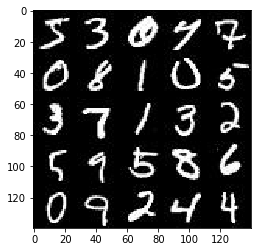

In [6]:
# Number of images to show
number_of_images = 25

# Image dimensions
img_width = img_height = 28

# Create mnist relative path
mnist_path = os.path.join(data_dir, 'mnist/*.jpg')

# Find all path names that match mnist_path
mnist_img_list = glob(mnist_path)

# Slice to get just the first n images
mnist_img_list_slice = mnist_img_list[:number_of_images]

# L for black and white
img_mode = 'L'

# Get image batch
mnist_images = get_batch(mnist_img_list_slice, img_width, img_height, img_mode)



# Plot images in a grid
pyplot.imshow(images_to_grid(mnist_images, 'L'), cmap='gray')

### CelebA

Contains over 200,000 celebrity colour images. They have [3 color channels (RGB)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).

Let's plot the default images:

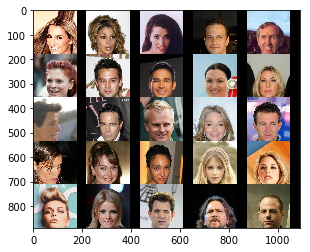

In [7]:
# Create celeba relative path
celeba_path = os.path.join(data_dir, 'img_align_celeba/*.jpg')

# Find all path names that match celeba_path
celeba_img_list = glob(celeba_path)

# Slice to get just the first n images
celeba_img_list_slice = celeba_img_list[:number_of_images]

# RGB for colour
img_mode = 'RGB'

# Get non-processed image batch
celeba_images = get_batch(celeba_img_list_slice, img_width, img_height, img_mode, process_img=False)

# Plot images in a grid
pyplot.imshow(images_to_grid(celeba_images, img_mode))

Now let's plot the **cropped** and **resized** images:

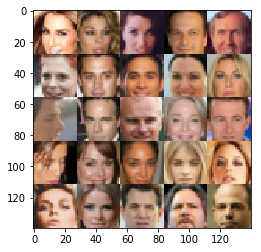

In [8]:
# Create celeba relative path
celeba_path = os.path.join(data_dir, 'img_align_celeba/*.jpg')

# Find all path names that match celeba_path
celeba_img_list = glob(celeba_path)

# Slice to get just the first n images
celeba_img_list_slice = celeba_img_list[:number_of_images]

# RGB for colour
img_mode = 'RGB'

# Get processed image batch
celeba_images = get_batch(celeba_img_list_slice, img_width, img_height, img_mode, process_img=True)

# Plot images in a grid
pyplot.imshow(images_to_grid(celeba_images, img_mode))

## Build Network

The GANs components were split into the following functions that we will build:

- `get_model_inputs`
- `get_discriminator_network`
- `get_generator_network`
- `get_model_loss_function`
- `get_model_optimizer`
- `train_model`


### Check Tensorflow version

In [9]:
from distutils.version import LooseVersion
import tensorflow as tf
import problem_unittests as tests

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

TensorFlow Version: 1.1.0


### Input

The `get_model_inputs` function creates **TF Placeholders** for the Neural Network. It should create the following placeholders:

- **Real images input** placeholder with rank 4: `batch_size`, `image_width`, `image_height`, and `image_channels`.
- **Noise input** placeholder with rank 2: `batch_size`, `noise_dim`.
- **Learning rate** placeholder with rank 0.

The function should return: (tensor of real images input, tensor of noise inpute, learning rate)

In [10]:
def get_model_inputs(image_width, image_height, image_channels, noise_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param noise_dim: The dimension of noise
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    
    input_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    
    # TODO: Create the input_noise float placeholder of rank 2 and give it a name
        # shape - (batch_size, noise_dim)
        
    # Your Code Here
    # input_noise = None 

    learning_rate = tf.placeholder(tf.float32, name='learning_rate')

    return input_real, input_noise, learning_rate

'''UNCOMMENT LAST LINE FOR TESTING''' 
# tests.test_model_inputs(get_model_inputs)

'UNCOMMENT LAST LINE FOR TESTING'

### Discriminator
The `get_discriminator_network` creates a discriminator neural network that discriminates on `images`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  

The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [11]:
def get_discriminator(input_images, reuse=False, alpha=0.2):
    """
    Create the discriminator network
    :param input_images: Tensor of input image(s): 28x28xMode
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
        
    with tf.variable_scope('discriminator', reuse=reuse):
        
        ''' LAYER 1 --------------------------------------------
            - Do not use batch normalization in first layer
        '''
        
        # INPUT -> 28x28x3
        
        # Convolution
        conv1 = tf.layers.conv2d(inputs=input_images, filters=64, kernel_size=(5, 5), strides=(1, 1), padding='same', kernel_initializer=tf.random_normal_initializer(stddev=0.02))
        # Leaky Relu Activation
        relu1 = tf.maximum(alpha * conv1, conv1)
        
        # OUTPUT -> 28x28x64
        
        
        ''' LAYER 2 -------------------------------------------- '''
        
        # INPUT -> 28x28x64
        
        # Convolution
        conv2 = tf.layers.conv2d(inputs=relu1, filters=128, kernel_size=(5, 5), strides=(2, 2), padding='same', kernel_initializer=tf.random_normal_initializer(stddev=0.02))
        # Normalization
        bn2 = tf.layers.batch_normalization(inputs=conv2, training=True)
        # Leaky Relu Activation
        relu2 = tf.maximum(alpha * bn2, bn2)
        
        # OUTPUT -> 14x14x128
        
        
        ''' LAYER 3 -------------------------------------------- '''
        
        # INPUT -> 14x14x128
    
        # Convolution
        conv3 = tf.layers.conv2d(inputs=relu2, filters=256, kernel_size=(5, 5), strides=(2, 2), padding='same', kernel_initializer=tf.random_normal_initializer(stddev=0.02))
        # Normalization
        bn3 = tf.layers.batch_normalization(inputs=conv3, training=True)
        # Leaky Relu Activation
        relu3 = tf.maximum(alpha * bn3, bn3)
        
        # OUTPUT -> 7x7x256
        
        
        ''' LAYER 4 --------------------------------------------'''
        
        # INPUT -> ?
        
        # TODO: BUILD LAYER 4
        
        # 1. Build Convolution using: tf.layers.conv2d()
            # inputs - previous layer output 
            # Units/Feature Maps/Filters - 512
            # Window/Kernel Size - (5, 5)
            # Strides - (2, 2)
            # Padding - 'same'
            # Kernel Init - Normal Distribution with 0.02 std
        # conv4 = None
            
        # 2. Add Batch Normalization using: tf.layers.batch_normalization()
            # training - True
        # bn4 = None
            
        # 3. Add relu4 Leaky Relu Activation Function using: tf.maximum()
            # Use smoothing with alpha param 
        # relu4 = None
        
        # OUTPUT -> ?    
        
        ''' OUTPUT LAYER --------------------------------------------'''

        # INPUT -> 4x4x512
        
        # Flatten Layer to 1 Dimension
        
        # TODO: Add output from Layer 4 as input tensor to flatten layer f5
        f5 = tf.reshape(tensor=None, shape=(-1, 4*4*512))
        # Fully Connected Layer
        logits = tf.layers.dense(inputs=f5, units=1, kernel_initializer=tf.random_normal_initializer(stddev=0.02))
        
        # Apply Dropout: discriminator is less prone to LEARN the data distribution
        # logits = score output
        logits = tf.layers.dropout(inputs=logits, rate=0.5)
        
        # Sigmoid Activation - Probability Output 
        out = tf.sigmoid(logits)
        
        # OUTPUT -> 1 (probability of being a real image)

    return out, logits

'''UNCOMMENT LAST LINE FOR TESTING''' 
# tests.test_discriminator(get_discriminator, tf)

'UNCOMMENT LAST LINE FOR TESTING'

### Generator
The `get_generator` creates a network to generate an image using `input_noise`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. 

The function should return the generated 28 x 28 x `output_dim` images.

In [13]:
def get_generator(input_noise, output_dim, is_train=True, alpha=0.2):
    """
    Create the generator network
    :param input_noise: Input Noise
    :param output_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
        
    with tf.variable_scope("generator", reuse=not is_train):
        
        ''' LAYER 1 -------------------------------------------- '''
        
        # TODO: BUILD FULLY CONNECTED LAYER 1
        
        # 1. Add the first Fully Connected Layer with tf.layers.dense()
            # inputs - input_noise
            # units - 4*4*512
        # f1 = None
        
        # 2. Reshape fully connected layer output with tf.reshape()
            # tensor - fully connected layer
            # shape - (-1, 4, 4, 512)
        # f1 = None
        
        # 3. Add Batch Normalization using: tf.layers.batch_normalization()
            # inputs - reshaped layer
            # training - is_train
        # bn1 = None
        
        # 4. Add Leaky Relu Activation Function using: tf.maximum()
            # Use smoothing with alpha param
        # relu1 = None
            
        # OUTPUT -> ?
            
        
        ''' LAYER 2 -------------------------------------------- '''
        
        # INPUT -> 4x4x512
        
        # Transposed Convolution
        
        # TODO: Add output from Layer 1 as input to layer 2
        transp_conv2 = tf.layers.conv2d_transpose(inputs=None, filters=256, kernel_size=(4, 4), strides=(1, 1), padding='valid', kernel_initializer=tf.random_normal_initializer(stddev=0.02))
        # Normalization
        bn2 = tf.layers.batch_normalization(inputs=transp_conv2, training=is_train)
        # Leaky Relu Activation
        relu2 = tf.maximum(alpha * bn2, bn2)
        
        # OUTPUT -> 7x7x256


        ''' LAYER 3 -------------------------------------------- '''
            
        # INPUT -> 7x7x256
        
        # Transposed Convolution
        transp_conv3 = tf.layers.conv2d_transpose(inputs=relu2, filters=128, kernel_size=(5, 5), strides=(2, 2), padding='same', kernel_initializer=tf.random_normal_initializer(stddev=0.02))
        # Normalization
        bn3 = tf.layers.batch_normalization(inputs=transp_conv3, training=is_train)
        # Leaky Relu Activation
        relu3 = tf.maximum(alpha * bn3, bn3)
        
        # OUTPUT -> 14x14x128
        
    
        ''' LAYER 4 -------------------------------------------- '''
        
        # INPUT -> ?
        
        # TODO: BUILD LAYER 4
        
        # 1. Build Transposed Convolution using: tf.layers.conv2d_transpose()
            # inputs - previous layer output
            # Units/Feature Maps/Filters - 64
            # Window/Kernel Size - (5, 5)
            # Strides - (2, 2)
            # Padding - 'same'
            # Kernel Init - Normal Distribution with 0.02 std
        # transp_conv4 = None
            
        # 2. Add Batch Normalization using: tf.layers.batch_normalization()
            # tensor - previous transposed convolution
            # training - is_train
        # bn4 = None
            
        # 3. Add Leaky Relu Activation Function using: tf.maximum()
            # Use smoothing with alpha param
        # relu4 = None
        # OUTPUT -> ?


        ''' OUTPUT -------------------------------------------- '''
        
        # INPUT -> 28x28x64
        
        # Transposed Convolution; logits = score output
        # TODO: Add output from Layer 4 as input to the last transpose convolution layer
        logits = tf.layers.conv2d_transpose(inputs=None, filters=output_dim, kernel_size=(3,3), strides=(1, 1), padding='same', kernel_initializer=tf.random_normal_initializer(stddev=0.02))
        
        # Tanh Activation
        out = tf.tanh(logits)
        
        # OUTPUT -> 28x28xOut_dim (generated image)
    
    return out

'''UNCOMMENT LAST LINE FOR TESTING''' 
# tests.test_generator(get_generator, tf)

'UNCOMMENT LAST LINE FOR TESTING'

### Loss
The `get_model_loss` builds the GANs for training and calculates the loss. Use the following functions we implemented:
- `get_discriminator(images, reuse=False)`
- `get_generator(input_noise, output_dim, is_train=True)`

The function should return a tuple of (discriminator loss, generator loss). 

In [14]:
def get_model_loss(input_real, input_noise, output_dim, alpha=0.2, smooth=0.9):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_noise: Noise input
    :param output_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """

    ''' GENERATOR ----------------------------------''' 
    
    g_model = get_generator(input_noise, output_dim, is_train=True, alpha=alpha)
    
    ''' DISCRIMINATOR ----------------------------------''' 
    
    d_real_model, d_real_logits = get_discriminator(input_real, reuse=False, alpha=alpha)
    
    # TODO: Build a new Discriminator instance that uses the SAME parameters
        # input - generator model
        # reuse - True (reuse parameters => One Discriminator)
        # alpha - alpha
        
    # We need this to be able to feed different inputs to the model: real & faked
    # d_fake_model, d_fake_logits = None 
    
    
    ''' DISCRIMINATOR CROSS ENTROPY ----------------------------------''' 
    
    # REAL INSTANCE
    
    # Sample smooth parameter
    smooth = np.random.uniform(0.7, 1.2)
    # Create discriminator targets/labels for real images(1), and smooth them
    d_real_labels = tf.ones_like(d_real_model) * smooth
    # Add cross entropy error calculator   
    d_real_errors = tf.nn.sigmoid_cross_entropy_with_logits(logits=d_real_logits, labels=d_real_labels)
    # Take the mean of the error for ALL outputs
    d_real_loss = tf.reduce_mean(d_real_errors)
    
    # FAKE INSTANCE
        
    # Sample smooth parameter
    smooth = np.random.uniform(0.0, 0.3)
    # Create discriminator targets/labels for fake images(0), and smooth them
    d_fake_labels = tf.zeros_like(d_fake_model) + smooth
    # Add cross entropy error calculator   
    d_fake_errors = tf.nn.sigmoid_cross_entropy_with_logits(logits=d_fake_logits, labels=d_fake_labels)
    # Take the mean of the error for ALL outputs
    d_fake_loss = tf.reduce_mean(d_fake_errors)
     
    # SUM ERROR LOSS
    
    # Add the two discriminator losses: real + fake
    d_loss = d_real_loss + d_fake_loss
    
    ''' GENERATOR CROSS ENTROPY ----------------------------------''' 
    
    
    # 1. Create generator targets/labels for real images (1) using tf.ones_like():
        # tensor - d_fake_logits
    g_real_logits = tf.ones_like(d_fake_logits)
    
    # TODO: BUILD GENERATOR LOSS
    
    # 2. Add cross entropy error calculator using tf.nn.sigmoid_cross_entropy_with_logits():
        # logits - d_fake_logits - !! training it using the discriminator's fake images loss !!
        # labels - g_real_logits
    # g_real_errors = None
    
    # 3. Take the mean of ALL outputs' error using tf.reduce_mean():
        # input_tensor - g_real_errors
    # g_loss = None
    
    # 4. Return generator mean loss as 2nd parameters
    
    return d_loss, None

'''UNCOMMENT LAST LINE FOR TESTING''' 
# tests.test_model_loss(get_model_loss)

'UNCOMMENT LAST LINE FOR TESTING'

### Optimization
Implement `get_model_optimizer` to create the optimization operations for the GANs. 

Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables. Filter the variables with names that are in the discriminator and generator scope names.  

The function should return a tuple of (discriminator training operation, generator training operation).

In [15]:
def get_model_optimizer(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    
    ''' GET DISCRIMINATOR & GENERATOR TRAINING VARIABLES ----------------'''
    # Get all trainable variables
    t_vars = tf.trainable_variables()
    
    # Filter only the discriminator's and generator's variables
    d_vars = [var for var in t_vars if var.name.startswith("discriminator")]
    g_vars = [var for var in t_vars if var.name.startswith("generator")]
    
    
    '''caveat: get generator update operations and add them as dependencies'''
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    g_updates = [op for op in update_ops if op.name.startswith('generator')]

    # Optimizers need to run only after generator's training variables were updated
    with tf.control_dependencies(g_updates):
        
        ''' DISCRIMINATOR OPTIMIZER ----------------'''
        
        # Construct a new Adam optimizer
            # beta1 - exponential decay rate for the 1st moment estimates
        d_train_optimizer = tf.train.AdamOptimizer(learning_rate, beta1=beta1)
        
        # Add operations to minimize error loss by updating var_list: computes and applies gradients
        d_train_minimizer = d_train_optimizer.minimize(d_loss, var_list=d_vars)
        
        ''' GENERATOR OPTIMIZER ----------------'''
        
        # TODO: GENERATOR OPTIMIZER
        # 1. Construct a new Adam optimizer using tf.train.AdamOptimizer()
            # learning_rate - learning_rate
            # beta1 - beta1
        # g_train_optimizer = None
        
        # 2. Call minimze() on it to add operations to minimize loss by updating var_list
            # loss - g_loss
            # var_list - g_vars
        # g_train_minimizer = None
        
        # 3. Return the generator minimizer as second parameter
    
    return d_train_minimizer, None

'''UNCOMMENT LAST LINE FOR TESTING''' 
# tests.test_model_opt(get_model_optimizer, tf)

'UNCOMMENT LAST LINE FOR TESTING'

## Neural Network Training
### Show Output
We use this function to show the current output of the generator during training. It will help us determine how well the GANs is training.

In [22]:
def show_generator_output(sess, n_images, input_noise, out_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_noise: Input Noise Tensor
    :param out_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    noise_dim = input_noise.get_shape().as_list()[-1]
    example_noise = np.random.uniform(-1, 1, size=[n_images, noise_dim])

    samples = sess.run(
        get_generator(input_noise, out_dim, False),
        feed_dict={input_noise: example_noise})

    images_grid = images_to_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train_model` to build and train the GANs.  Use the functions you implemented:
- `get_model_inputs(image_width, image_height, image_channels, z_dim)`
- `get_model_loss(input_real, input_z, out_channel_dim)`
- `get_model_optimizer(d_loss, g_loss, learning_rate, beta1)`


In [21]:
def train_model(epoch_count, batch_size, noise_dim, learn_rate, beta1, get_batches, data_shape, data_image_mode, alpha):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param noise_dim: Noise dimension
    :param learn_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    
    '''CONFIG VARIABLES -----------------------------------'''
    
    print_every = 10
    # A smaller value will increase training time and notebook size
    show_every = 100
    steps = 0
    
    _, image_width, image_height, image_channels = data_shape

    
    '''BUILD MODELS -----------------------------------'''
    
    # Get Inputs and Learning Rate
    input_real, input_noise, learning_rate = get_model_inputs(image_width, image_height, image_channels, noise_dim)
    # Get cross entropy models
    d_loss, g_loss = get_model_loss(input_real, input_noise, image_channels, alpha)
    
    
    # TODO: Add optimizers to the models using get_model_optimizer():
        # d_loss - discriminator
        # g_loss - generator
        # learning_rate - learning_rate
        # beta1 - beta1
        
    # d_min, g_min = None
    
    '''TRAIN MODELS -----------------------------------'''
    
    # Create a new TF session
    with tf.Session() as sess:
        
        # Initialize training variables
        sess.run(tf.global_variables_initializer())
        
        # Show Generated images before training
        
        # Loop over epochs
        for e in range(epoch_count):
            # Iterate over batches
            for batch_images in get_batches(batch_size):
                
                # Rescaling images for tanh activation
                batch_images *= 2
                
                steps += 1
                
                # Sample random noise for generator's batch
                batch_noise = np.random.uniform(-1, 1, size=(batch_size, noise_dim))
            
            
                ''' SHOW STARTING INPUT NOISE -----------------------------------'''
                
                if steps == 1:
                    print("\n TRAINING STARTED WITH: \n")
                    
                    cmap = None if data_image_mode == 'RGB' else 'gray'
                    pyplot.imshow(batch_noise, cmap=cmap)
                    pyplot.show()
                
                
                ''' RUN OPTIMIZERS -----------------------------------'''
                
                # Run Discriminator
                _ = sess.run(d_min, feed_dict={input_real: batch_images, input_noise: batch_noise, learning_rate: learn_rate})
                
                # TODO: RUN GENERATOR
                # 1. Run generator using sess.run():
                    # graph - created generator
                    # feed_dict - input_noise: batch noise, learning_rate: learn_rate
                    
                # Don't store the output
                
                # _ = None
                
                
                ''' PRINT TRAINING INFORMATION -----------------------------------'''
                
                if steps % print_every == 0:
                    
                    # Evaluate the discriminator to get the loss
                    d_train_loss = d_loss.eval({input_noise: batch_noise, input_real:batch_images})
                    
                    # TODO: GENERATOR LOSS
                    # 1. Evaluate the generator loss using generator.eval()
                        # input - batch noise
                    # g_train_loss = None
                    
                    # 2. Add the loss to generator's format()
                    
                    print("Epoch {}/{}...".format(e + 1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(d_train_loss),
                          "Generator Loss: {:.4f}".format(None))
                
                ''' SHOW GENERATOR OUTPUT -----------------------------------'''
                
                if steps % show_every == 0:
                    show_generator_output(sess, number_of_images, input_noise, image_channels, data_image_mode)
                    
        ''' SHOW GENERATED IMAGE AFTER TRAINING -----------------------------------'''
        
        print("\n TRAINING ENDED WITH: \n")
        show_generator_output(sess, number_of_images, input_z, image_channels, data_image_mode)

### MNIST
Let's test the GANs architecture on MNIST. The GANs should be able to generate images that look like handwritten digits after 2 epochs.  The loss of the generator should be lower than the loss of the discriminator or close to 0.

In [20]:
''' CHOOSE HYPER-PARAMETERS ------------------------------'''

# Batch Size - 32, 64, 128, 256
batch_size = 64

# Input Noise Dimension
noise_dim = 100

# Learning Rate
learning_rate = 0.001

# 1st moment's exponential decay rate
beta1 = 0.5

# Leaky Relu Smoothing
alpha=0.2

# Number of Epochs
epochs = 2


''' LOAD MNIST DATASET ----------------------------'''

# Dataset Name
d_name = 'mnist'
# Dataset Files
d_files = glob(os.path.join(data_dir, 'mnist/*.jpg'))
# Load data - Wrapper that retrives batches and handles the pixel normalization in the range of -0.5 to 0.5.
mnist_dataset = Dataset(d_name, d_files)


''' TRAIN MODEL ---------------------------'''

# Reset Global Graph
tf.reset_default_graph()

# Create New Graph & Make it Default
with tf.Graph().as_default():
    
    # Train model
    train_model(epochs, batch_size, noise_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode, alpha)

NameError: name 'input_noise' is not defined

### CelebA
Run your GANs on CelebA - one epoch ~ 20 minutes on GPU.

In [2]:
''' HYPER-PARAMETERS ------------------------------'''

# TODO: CHOOSE HYPER-PARAMETERS

batch_size = None # 32, 64, 128, 256
noise_dim = None # 100
learning_rate = None # 0.00002 <-> 0.2
beta1 = None # 0.1 <-> 0.8
alpha= None # Close to 0
epochs = None # 1 <-> 20


''' LOAD CELEBA DATASET ----------------------------'''

# Dataset Name
d_name = 'celeba'
# Dataset Files
d_files = glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))
# Load data - Wrapper that retrives batches and handles the pixel normalization in the range of -0.5 to 0.5.
celeba_dataset = Dataset(d_name, d_files)


''' TRAIN MODEL ---------------------------'''

# Reset Global Graph
tf.reset_default_graph()

# Create New Graph & Make it Default
with tf.Graph().as_default():
    
    # Train model
    train_model(epochs, batch_size, noise_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode, alpha)

NameError: name 'glob' is not defined


# Face Generation Training Runs Examples

## The Workshop Gan

The network was trained for 1 epoch on a GPU (20 min) using the following architecture:

(?, 4, 4, 512) <br>
(?, 7, 7, 256)<br>
(?, 14, 14, 128)<br>
(?, 28, 28, 64)<br>

...and parameters:

* `batch_size = 128`
* `z_dim = 100`
* `learning_rate = 0.0002`
* `beta1 = 0.5`
* `alpha=0.2`


TRAINING STARTED WITH:


<img src="images/training_gans/tr_gan_0.png" alt="" title="" width="250"/>


Epoch 1/1... Discriminator Loss: 0.4298... Generator Loss: 9.4715 <br>
Epoch 1/1... Discriminator Loss: 1.0240... Generator Loss: 15.3282<br>
Epoch 1/1... Discriminator Loss: 4.1733... Generator Loss: 0.0161<br>
Epoch 1/1... Discriminator Loss: 1.8750... Generator Loss: 0.1838<br>
Epoch 1/1... Discriminator Loss: 2.0445... Generator Loss: 12.1091<br>
Epoch 1/1... Discriminator Loss: 1.2593... Generator Loss: 11.1769<br>
Epoch 1/1... Discriminator Loss: 1.5126... Generator Loss: 7.9401<br>
Epoch 1/1... Discriminator Loss: 0.6277... Generator Loss: 8.6438<br>
Epoch 1/1... Discriminator Loss: 2.0230... Generator Loss: 0.1266<br>
Epoch 1/1... Discriminator Loss: -0.0029... Generator Loss: 2.4208<br>

<img src="images/training_gans/tr_gan_1.png" alt="" title="" />

Epoch 1/1... Discriminator Loss: -0.0784... Generator Loss: 5.1476<br>
Epoch 1/1... Discriminator Loss: 1.8290... Generator Loss: 17.6707<br>
Epoch 1/1... Discriminator Loss: -0.0246... Generator Loss: 6.1915<br>
Epoch 1/1... Discriminator Loss: 0.0190... Generator Loss: 1.9743<br>
Epoch 1/1... Discriminator Loss: 0.4150... Generator Loss: 14.6738<br>
Epoch 1/1... Discriminator Loss: -0.0627... Generator Loss: 4.5614<br>
Epoch 1/1... Discriminator Loss: 0.3366... Generator Loss: 2.5539<br>
Epoch 1/1... Discriminator Loss: 0.8743... Generator Loss: 0.9518<br>
Epoch 1/1... Discriminator Loss: 0.4642... Generator Loss: 1.6608<br>
Epoch 1/1... Discriminator Loss: 0.4451... Generator Loss: 1.7998<br>

<img src="images/training_gans/tr_gan_2.png" alt="" title="" />
Epoch 1/1... Discriminator Loss: 0.7146... Generator Loss: 1.2367<br>
Epoch 1/1... Discriminator Loss: 1.3221... Generator Loss: 4.9012<br>
Epoch 1/1... Discriminator Loss: 1.8907... Generator Loss: 0.1722<br>
Epoch 1/1... Discriminator Loss: 0.6089... Generator Loss: 1.0472<br>
Epoch 1/1... Discriminator Loss: 1.7143... Generator Loss: 0.3841<br>
Epoch 1/1... Discriminator Loss: 0.7215... Generator Loss: 0.9291<br>
Epoch 1/1... Discriminator Loss: 0.9542... Generator Loss: 0.5734<br>
Epoch 1/1... Discriminator Loss: 0.7249... Generator Loss: 1.6378<br>
Epoch 1/1... Discriminator Loss: 0.1979... Generator Loss: 2.5273<br>
Epoch 1/1... Discriminator Loss: 0.5842... Generator Loss: 1.3014<br>

<img src="images/training_gans/tr_gan_3.png" alt="" title="" />

Epoch 1/1... Discriminator Loss: 0.4622... Generator Loss: 2.3273<br>
Epoch 1/1... Discriminator Loss: 0.2671... Generator Loss: 2.3371<br>
Epoch 1/1... Discriminator Loss: 0.7660... Generator Loss: 1.5883<br>
Epoch 1/1... Discriminator Loss: 0.4443... Generator Loss: 2.2174<br>
Epoch 1/1... Discriminator Loss: 0.8665... Generator Loss: 3.1868<br>
Epoch 1/1... Discriminator Loss: 0.6061... Generator Loss: 2.9662<br>
Epoch 1/1... Discriminator Loss: 0.6717... Generator Loss: 1.5483<br>
Epoch 1/1... Discriminator Loss: 0.3951... Generator Loss: 1.6183<br>
Epoch 1/1... Discriminator Loss: 0.5895... Generator Loss: 0.9903<br>
Epoch 1/1... Discriminator Loss: 0.4761... Generator Loss: 1.6395<br>

<img src="images/training_gans/tr_gan_4.png" alt="" title="" />

Epoch 1/1... Discriminator Loss: 0.6081... Generator Loss: 1.4078<br>
Epoch 1/1... Discriminator Loss: 0.2591... Generator Loss: 1.8230<br>
Epoch 1/1... Discriminator Loss: 0.6978... Generator Loss: 1.4397<br>
Epoch 1/1... Discriminator Loss: 0.7171... Generator Loss: 1.0106<br>
Epoch 1/1... Discriminator Loss: 0.3778... Generator Loss: 1.6099<br>
Epoch 1/1... Discriminator Loss: 1.8129... Generator Loss: 0.2599<br>
Epoch 1/1... Discriminator Loss: 0.4596... Generator Loss: 1.5254<br>
Epoch 1/1... Discriminator Loss: 0.6582... Generator Loss: 1.3251<br>
Epoch 1/1... Discriminator Loss: 0.5345... Generator Loss: 2.2486<br>
Epoch 1/1... Discriminator Loss: 0.5089... Generator Loss: 1.5724<br>

<img src="images/training_gans/tr_gan_5.png" alt="" title="" />

Epoch 1/1... Discriminator Loss: 0.4723... Generator Loss: 2.3898<br>
Epoch 1/1... Discriminator Loss: 0.7921... Generator Loss: 3.5966<br>
Epoch 1/1... Discriminator Loss: 0.8855... Generator Loss: 0.8234<br>
Epoch 1/1... Discriminator Loss: 0.8206... Generator Loss: 3.1045<br>
Epoch 1/1... Discriminator Loss: 0.5825... Generator Loss: 2.4258<br>
Epoch 1/1... Discriminator Loss: 0.8055... Generator Loss: 1.1872<br>
Epoch 1/1... Discriminator Loss: 0.9237... Generator Loss: 3.5931<br>
Epoch 1/1... Discriminator Loss: 0.6888... Generator Loss: 1.2825<br>
Epoch 1/1... Discriminator Loss: 0.5755... Generator Loss: 1.4103<br>
Epoch 1/1... Discriminator Loss: 1.6744... Generator Loss: 5.9800<br>

<img src="images/training_gans/tr_gan_6.png" alt="" title="" />

Epoch 1/1... Discriminator Loss: 0.6515... Generator Loss: 1.3010<br>
Epoch 1/1... Discriminator Loss: 0.7337... Generator Loss: 1.8314<br>
Epoch 1/1... Discriminator Loss: 1.2294... Generator Loss: 4.9153<br>
Epoch 1/1... Discriminator Loss: 0.6438... Generator Loss: 1.1011<br>
Epoch 1/1... Discriminator Loss: 0.6367... Generator Loss: 2.5483<br>
Epoch 1/1... Discriminator Loss: 1.1894... Generator Loss: 0.5839<br>
Epoch 1/1... Discriminator Loss: 1.2659... Generator Loss: 0.6085<br>
Epoch 1/1... Discriminator Loss: 0.8674... Generator Loss: 2.7563<br>
Epoch 1/1... Discriminator Loss: 0.7771... Generator Loss: 1.8574<br>
Epoch 1/1... Discriminator Loss: 1.2135... Generator Loss: 2.4083<br>

<img src="images/training_gans/tr_gan_7.png" alt="" title="" />

Epoch 1/1... Discriminator Loss: 0.5256... Generator Loss: 1.2290<br>
Epoch 1/1... Discriminator Loss: 1.2304... Generator Loss: 0.5795<br>
Epoch 1/1... Discriminator Loss: 1.4006... Generator Loss: 3.6635<br>
Epoch 1/1... Discriminator Loss: 0.6954... Generator Loss: 1.4900<br>
Epoch 1/1... Discriminator Loss: 1.0351... Generator Loss: 0.6322<br>
Epoch 1/1... Discriminator Loss: 1.0395... Generator Loss: 0.7237<br>
Epoch 1/1... Discriminator Loss: 1.6538... Generator Loss: 0.5384<br>
Epoch 1/1... Discriminator Loss: 0.8279... Generator Loss: 2.5696<br>
Epoch 1/1... Discriminator Loss: 0.9928... Generator Loss: 0.7201<br>
Epoch 1/1... Discriminator Loss: 0.9174... Generator Loss: 0.9748<br>

<img src="images/training_gans/tr_gan_8.png" alt="" title="" />

Epoch 1/1... Discriminator Loss: 0.9190... Generator Loss: 1.2430<br>
Epoch 1/1... Discriminator Loss: 0.6848... Generator Loss: 1.9938<br>
Epoch 1/1... Discriminator Loss: 0.9798... Generator Loss: 0.7547<br>
Epoch 1/1... Discriminator Loss: 0.7567... Generator Loss: 0.9934<br>
Epoch 1/1... Discriminator Loss: 1.3977... Generator Loss: 3.4005<br>
Epoch 1/1... Discriminator Loss: 0.7271... Generator Loss: 0.8694<br>
Epoch 1/1... Discriminator Loss: 1.0720... Generator Loss: 0.6841<br>
Epoch 1/1... Discriminator Loss: 0.7621... Generator Loss: 1.1961<br>
Epoch 1/1... Discriminator Loss: 1.4667... Generator Loss: 0.4207<br>
Epoch 1/1... Discriminator Loss: 1.5047... Generator Loss: 0.3620<br>

<img src="images/training_gans/tr_gan_9.png" alt="" title="" />

Epoch 1/1... Discriminator Loss: 0.4520... Generator Loss: 2.7095<br>
Epoch 1/1... Discriminator Loss: 0.9119... Generator Loss: 1.6481<br>
Epoch 1/1... Discriminator Loss: 1.0286... Generator Loss: 0.7685<br>
Epoch 1/1... Discriminator Loss: 0.8612... Generator Loss: 0.7704<br>
Epoch 1/1... Discriminator Loss: 0.7151... Generator Loss: 1.1690<br>
Epoch 1/1... Discriminator Loss: 0.8636... Generator Loss: 0.8027<br>
Epoch 1/1... Discriminator Loss: 0.8443... Generator Loss: 0.7947<br>
Epoch 1/1... Discriminator Loss: 0.9244... Generator Loss: 0.9142<br>
Epoch 1/1... Discriminator Loss: 1.1093... Generator Loss: 0.7184<br>
Epoch 1/1... Discriminator Loss: 1.1457... Generator Loss: 0.5507<br>

<img src="images/training_gans/tr_gan_10.png" alt="" title="" />

Epoch 1/1... Discriminator Loss: 0.8889... Generator Loss: 1.1012<br>
Epoch 1/1... Discriminator Loss: 0.9494... Generator Loss: 0.7045<br>
Epoch 1/1... Discriminator Loss: 0.6929... Generator Loss: 0.9859<br>
Epoch 1/1... Discriminator Loss: 0.8791... Generator Loss: 1.9098<br>
Epoch 1/1... Discriminator Loss: 0.6999... Generator Loss: 2.4405<br>
Epoch 1/1... Discriminator Loss: 1.0412... Generator Loss: 0.5832<br>
Epoch 1/1... Discriminator Loss: 0.8110... Generator Loss: 0.9122<br>
Epoch 1/1... Discriminator Loss: 0.7772... Generator Loss: 2.0963<br>
Epoch 1/1... Discriminator Loss: 0.6504... Generator Loss: 1.1593<br>
Epoch 1/1... Discriminator Loss: 0.9867... Generator Loss: 0.6772<br>

<img src="images/training_gans/tr_gan_11.png" alt="" title="" />

Epoch 1/1... Discriminator Loss: 0.8341... Generator Loss: 1.1532<br>
Epoch 1/1... Discriminator Loss: 0.6860... Generator Loss: 1.3845<br>
Epoch 1/1... Discriminator Loss: 0.9974... Generator Loss: 1.6694<br>
Epoch 1/1... Discriminator Loss: 0.9963... Generator Loss: 1.8005<br>
Epoch 1/1... Discriminator Loss: 0.9991... Generator Loss: 1.9604<br>
Epoch 1/1... Discriminator Loss: 0.9583... Generator Loss: 1.1015<br>
Epoch 1/1... Discriminator Loss: 1.1848... Generator Loss: 2.3291<br>
Epoch 1/1... Discriminator Loss: 0.8714... Generator Loss: 1.0272<br>
Epoch 1/1... Discriminator Loss: 0.6795... Generator Loss: 1.2966<br>
Epoch 1/1... Discriminator Loss: 0.5825... Generator Loss: 1.5986<br>

<img src="images/training_gans/tr_gan_12.png" alt="" title="" />

Epoch 1/1... Discriminator Loss: 1.1010... Generator Loss: 1.6200<br>
Epoch 1/1... Discriminator Loss: 0.8179... Generator Loss: 1.3446<br>
Epoch 1/1... Discriminator Loss: 0.7798... Generator Loss: 1.1066<br>
Epoch 1/1... Discriminator Loss: 0.5742... Generator Loss: 2.0324<br>
Epoch 1/1... Discriminator Loss: 0.9977... Generator Loss: 0.9695<br>
Epoch 1/1... Discriminator Loss: 0.6828... Generator Loss: 1.3430<br>
Epoch 1/1... Discriminator Loss: 1.0270... Generator Loss: 3.0913<br>
Epoch 1/1... Discriminator Loss: 0.6497... Generator Loss: 1.1498<br>
Epoch 1/1... Discriminator Loss: 0.4451... Generator Loss: 1.6265<br>
Epoch 1/1... Discriminator Loss: 1.3354... Generator Loss: 0.4484<br>

<img src="images/training_gans/tr_gan_13.png" alt="" title="" />

Epoch 1/1... Discriminator Loss: 0.6999... Generator Loss: 3.0217<br>
Epoch 1/1... Discriminator Loss: 0.7053... Generator Loss: 1.7654<br>
Epoch 1/1... Discriminator Loss: 0.8357... Generator Loss: 2.1246<br>
Epoch 1/1... Discriminator Loss: 0.5295... Generator Loss: 1.4909<br>
Epoch 1/1... Discriminator Loss: 0.5342... Generator Loss: 1.2964<br>
Epoch 1/1... Discriminator Loss: 0.9421... Generator Loss: 0.8351<br>
Epoch 1/1... Discriminator Loss: 0.8909... Generator Loss: 2.1339<br>
Epoch 1/1... Discriminator Loss: 0.8991... Generator Loss: 0.8042<br>
Epoch 1/1... Discriminator Loss: 0.8077... Generator Loss: 1.2101<br>
Epoch 1/1... Discriminator Loss: 0.8955... Generator Loss: 0.9616<br>

<img src="images/training_gans/tr_gan_14.png" alt="" title="" />

Epoch 1/1... Discriminator Loss: 0.6560... Generator Loss: 1.1117<br>
Epoch 1/1... Discriminator Loss: 1.1658... Generator Loss: 3.4216<br>
Epoch 1/1... Discriminator Loss: 0.9046... Generator Loss: 0.7543<br>
Epoch 1/1... Discriminator Loss: 1.3880... Generator Loss: 0.3891<br>
Epoch 1/1... Discriminator Loss: 0.8225... Generator Loss: 1.0737<br>
Epoch 1/1... Discriminator Loss: 0.9603... Generator Loss: 2.2492<br>
Epoch 1/1... Discriminator Loss: 0.7936... Generator Loss: 1.8629<br>
Epoch 1/1... Discriminator Loss: 0.6520... Generator Loss: 1.6928<br>
Epoch 1/1... Discriminator Loss: 0.5893... Generator Loss: 1.3983<br>
Epoch 1/1... Discriminator Loss: 0.7224... Generator Loss: 1.4795<br>

<img src="images/training_gans/tr_gan_16.png" alt="" title="" />

Epoch 1/1... Discriminator Loss: 0.7129... Generator Loss: 1.5795<br>
Epoch 1/1... Discriminator Loss: 1.5599... Generator Loss: 3.6394<br>
Epoch 1/1... Discriminator Loss: 0.7124... Generator Loss: 1.8255<br>
Epoch 1/1... Discriminator Loss: 0.7126... Generator Loss: 1.0539<br>
Epoch 1/1... Discriminator Loss: 0.7668... Generator Loss: 0.8774<br>
Epoch 1/1... Discriminator Loss: 0.9699... Generator Loss: 0.6872<br>
Epoch 1/1... Discriminator Loss: 1.1598... Generator Loss: 0.4751<br>
Epoch 1/1... Discriminator Loss: 1.0319... Generator Loss: 0.7047<br>

<img src="images/training_gans/tr_gan_17.png" alt="" title="" />


## Top Edge Gan relesead in October 2017

* **Start**
<img src="images/training_gans/pgg_training_0.png" alt="" title="" />

* **Middle**
<img src="images/training_gans/pgg_training_1.png" alt="" title="" />

* **End**
<img src="images/training_gans/pgg_training_2.png" alt="" title="" />



* From paper __[Progressive Growing of GANs for Improved Quality, Stability, and Variation](http://research.nvidia.com/publication/2017-10_Progressive-Growing-of)__
* Training __[video](https://www.youtube.com/watch?v=XOxxPcy5Gr4&feature=youtu.be)__
* Imaginary celebrities __[video](https://www.youtube.com/watch?v=36lE9tV9vm0&feature=youtu.be)__

# Other Resources

* Main Research Paper - __[Generative Adversarial Networks](https://arxiv.org/abs/1406.2661)__
* Ian Goodfellow's __[tutorial](https://arxiv.org/abs/1701.00160)__
* __[Improved Techniques for Training GANs](https://arxiv.org/abs/1606.03498)__
* List of __[All named GANs](https://github.com/hindupuravinash/the-gan-zoo)__
* Tutorials:
    * __[Understanding GANs](https://danieltakeshi.github.io/2017/03/05/understanding-generative-adversarial-networks/)__
    * __[GANs](http://www.rricard.me/machine/learning/generative/adversarial/networks/2017/04/05/gans-part1.html)__
    * __[Cool Tool](http://cs.stanford.edu/people/karpathy/gan/)__ by __[Andrej Karpathy](http://karpathy.github.io/)__
    * __[GANs Research Paper Review](https://adeshpande3.github.io/adeshpande3.github.io/Deep-Learning-Research-Review-Week-1-Generative-Adversarial-Nets)__

# Thank You

Special thanks to __[Udacity](https://github.com/udacity/deep-learning/tree/master/face_generation/)__ for providing the architecture scaffold for this workshop.